In [17]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [18]:
kat3 = finesse.kat()
kat3.verbose=True
kat3.parse("""


l laser 10 0 nin                  
mod EOM 58.26712M 0.001 1 pm nin n0 
maxtem 3                         
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4                        
m ITM 0.98997 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99996 0.00001 0 n6 n7                 

s s2 0.1 n3 n8                       
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump 
           

cav cavity ITM n5 ETM n6 
trace 2                  
attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0         
pd1 PDrefl 58.26712M 0 n8*   
pd1 PDtrans 58.26712M 0 n7



s s20 0.1 n7 n80                       
bs bsQPD0 0.5 0.5 0 45 n80 n90 n100 dump 
s sQPD1 0.1 n9 n110                   
s sQPD2 0.1 n10 n120                  


attr s20 g 40 

attr sQPD1 g 30   
attr sQPD2 g 120 

pd1 QPDtrans1 58.26712M 0 n110 
pdtype QPDtrans1 x-split   

pd1 QPDtrans2 58.26712M 0 n120 
pdtype QPDtrans2 x-split   

set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z             
#xaxis ITM xbeta lin 0 0.3m 800 
xaxis ETM xbeta lin 0 0.3m 800  

""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-08-27 01:04:15.428494


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 57.8547 seconds

--- Output info ---

Run date and time: 2022-08-27 01:04:15.428493
Detectors used: PDrefl, PDtrans, QPDtrans1, QPDtrans2, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0003 800']
PDrefl    : min = -9.999745758833709e-09 max = 9.999950503065400e-09
PDtrans   : min = -8.701742996036550e-10 max = 7.625811373428100e-10
QPDtrans1 : min = -5.394089887669630e-07 max = 1.158073028126330e-04
QPDtrans2 : min = -2.053150244121610e-04 max = 0.000000000000000e+00
z         : min = 0.000000000000000e+00 max = 7.778054291757100e+01


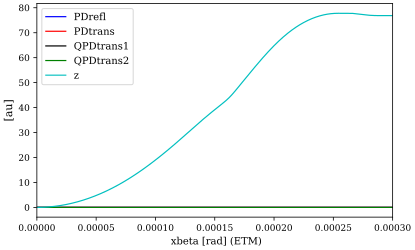

In [19]:
out2 = kat3.run()
out2.info()
out2.plot()

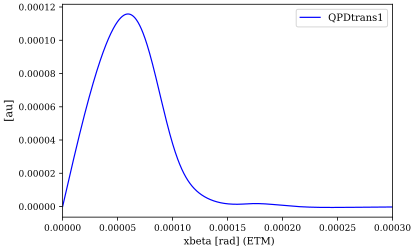

In [20]:
out2.plot(['QPDtrans1'])

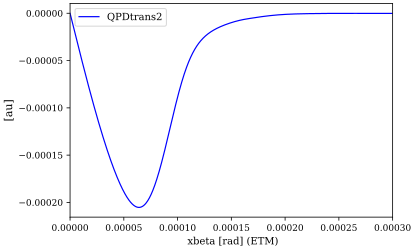

In [21]:
out2.plot(['QPDtrans2'])

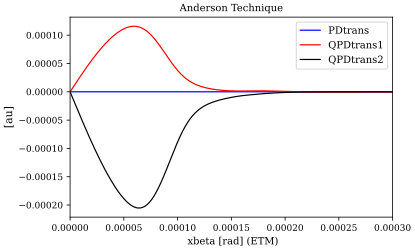

In [22]:
out2.plot(['QPDtrans1','QPDtrans2','PDtrans'],title='Anderson Technique')


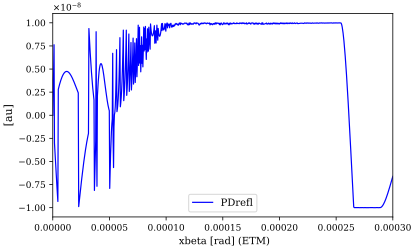

In [23]:
out2.plot(['PDrefl'])

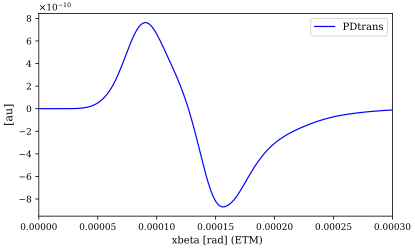

In [24]:
out2.plot(['PDtrans'])

In [25]:
for M in range(0,180,10):
    kat4 = kat3.deepcopy()
    kat4.parse("""
    pd1 QPDtrans1 58.26712M {f} n110
    pdtype QPDtrans1 x-split  

    pd1 QPDtrans2 58.26712M {f} n120 
    pdtype QPDtrans2 x-split  
    #attr sQPD2 g {g} """.format(f=M,g=M+90))
    out4 = kat4.run()
    #out3.info()
    plt.plot(out4.x,out4['QPDtrans1'])
    plt.plot(out4.x,out4['QPDtrans2'])
    plt.legend(["QPDtrans2", "QPDtrans1"], loc ="lower right")
    plt.title('Anderson Technique Demod test phase '+str(M))
    plt.xlabel("Misalignment mrad")
    plt.ylabel("Error Signal")
    #plt.savefig(str(M)+'Ward Technique_Soft_mode_new.png')
    plt.show()
    plt.clf()


Removed existing object 'QPDtrans1' of type <class
'pykat.detectors.pykat.detectors.pd_101'> to add line 'pd1
QPDtrans1 58.26712M 0 n110'


Removed existing object 'QPDtrans2' of type <class
'pykat.detectors.pykat.detectors.pd_102'> to add line 'pd1
QPDtrans2 58.26712M 0 n120'

--------------------------------------------------------------
Running kat - Started at 2022-08-27 01:05:16.278190


 97% | ETA:  0:00:01 | Calculating - Locked ✓ (Locking steps tried 3/10000)    


Keyboard interrupt caught, stopped simulation.


Finished in 58.0812 seconds


AttributeError: 'NoneType' object has no attribute 'x'